In [3]:
# Use the dicts generated by create_dicts.py

import numpy as np
import os
import json
from functions import *
import statistics as stat
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns
from statsmodels.nonparametric.kernel_density import KDEMultivariate
import matplotlib.tri as tri
import cv2
import statistics as stats

from tqdm import tqdm
import pandas as pd
import scipy
import scipy.stats as st
from sklearn.datasets import make_blobs
from scipy.optimize import minimize
import seaborn as sns


from skopt.plots import plot_convergence, plot_objective
# import jax
# import jax.numpy as jnp

%run functions.py

%matplotlib inline


from tqdm import tqdm
#import create_dicts
# ------- my personal graphing style --------------------

#plt.style.use('ggplot')gre

# golden_mean = (np.sqrt(5)-1.0)/2.0 # Aesthetic ratio
# fig_width = 8. # Width in inches
# fig_height = 1.1*fig_width*golden_mean # Height in inches
# fig_size = [fig_width,fig_height] # Figure size
# params = {'backend': 'pdf',
# 'legend.fontsize': 14,
# 'xtick.labelsize' : 14,
# 'ytick.labelsize' : 14,
# 'axes.labelsize' : 16,
# 'figure.figsize': fig_size}
# plt.rcParams.update(params)
# rc("font", **{"size": 10, "family": "serif", "serif": ["Computer Modern"]})
# rc("text", usetex=True)
# # -------------------------------------------------------

golden_mean = (np.sqrt(5)-1.0)/2.0 # Aesthetic ratio
fig_width = 8. # Width in inches
fig_height = 1.1*fig_width*golden_mean # Height in inches
fig_size = [fig_width,fig_height] # Figure size
params = {'backend': 'pdf',
'legend.fontsize': 14,
'xtick.labelsize' : 14,
'ytick.labelsize' : 14,
'axes.labelsize' : 16,
'figure.figsize': fig_size}
plt.rcParams.update(params)
rc("font", **{"size": 10, "family": "serif", "serif": ["Computer Modern"]})
rc("text", usetex=True)
# -------------------------------------------------------

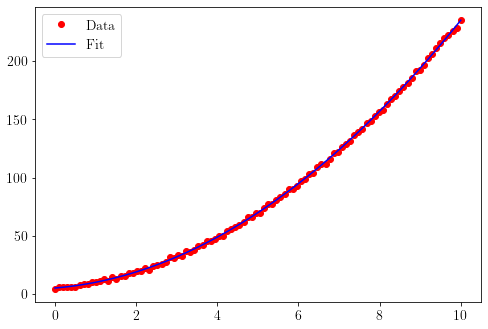

In [41]:
%run functions.py

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


# Define the objective function that we want to minimize
def objective(params, x, y):
    a, b, c = params
    return np.sum((y - (a * x**2 + b * x + c))**2)

# Generate some sample data
x = np.linspace(0, 10, 100)
y = 2 * x**2 + 3 * x + 5 + np.random.normal(0, 1, 100)

# Define the function to plot the optimized parameters
def plot_params(params, x, y):
    a, b, c = params
    plt.plot(x, y, 'ro', label='Data')
    plt.plot(x, a * x**2 + b * x + c, 'b-', label='Fit')
    plt.legend()
    plt.show()

# Call minimize to find the optimized parameters
params0 = [1, 1, 1]  # Initial guess for the parameters
res = minimize(objective, params0, args=(x, y))

# Plot the optimized parameters
plot_params(res.x, x, y)

In [42]:
import numpy as np
from scipy.optimize import minimize

# Define the objective function
def rosenbrock(x):
    return np.sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

# Set up the optimization problem
x0 = np.array([0.0, 0.0])
res = minimize(rosenbrock, x0, method='BFGS')

# Run the optimization algorithm multiple times with different initial values
n_runs = 100
optimal_values = np.zeros(n_runs)
for i in range(n_runs):
    x0 = np.random.randn(2)
    res = minimize(rosenbrock, x0, method='BFGS')
    optimal_values[i] = res.fun

# Plot the probability distribution of the optimal objective function values
import matplotlib.pyplot as plt
plt.hist(optimal_values, bins=20, density=True)
plt.xlabel('Optimal objective function value')
plt.ylabel('Probability density')
plt.show()

KeyboardInterrupt: 

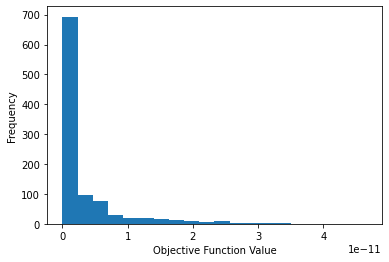

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the objective function that takes two variables as input
def obj_func(x):
    return (x[0]-1)**2 + (x[1]-2)**2

# Define a range of values for each variable
x_range = np.linspace(-10, 10, 100)
y_range = np.linspace(-10, 10, 100)

# Create a grid of values for each variable
x_grid, y_grid = np.meshgrid(x_range, y_range)

# Flatten the grids into 1-dimensional arrays
x_values = x_grid.flatten()
y_values = y_grid.flatten()

# Create an initial guess for the two variables
x0 = [0, 0]

# Use the minimize function to find the minimum for many initial guesses
num_samples = 1000
min_values = []
for i in range(num_samples):
    res = minimize(obj_func, x0)
    min_values.append(res.fun)
    x0 = np.random.uniform(-10, 10, size=2)  # randomly initialize x0 for next iteration

# Plot a histogram of the minimum objective function values
plt.hist(min_values, bins=20)
plt.xlabel('Objective Function Value')
plt.ylabel('Frequency')
plt.show()


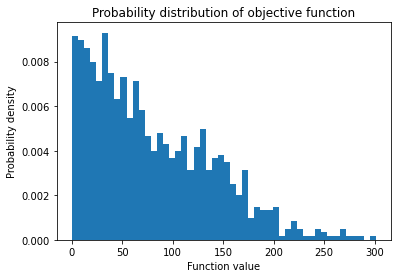

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define objective function
def f(x):
    return (x[0]-2)**2 + (x[1]-3)**2

# Define search space bounds
bounds = ((-10, 10), (-10, 10))

# Number of samples to generate
n_samples = 1000

# Generate random samples within bounds
x_samples = np.random.uniform(bounds[0][0], bounds[0][1], n_samples)
y_samples = np.random.uniform(bounds[1][0], bounds[1][1], n_samples)
samples = np.column_stack((x_samples, y_samples))

# Evaluate objective function at sample points
f_values = [f(sample) for sample in samples]

# Plot histogram of function values
plt.hist(f_values, bins=50, density=True)

plt.xlabel('Function value')
plt.ylabel('Probability density')
plt.title('Probability distribution of objective function')

plt.show()


In [ ]:
x1_range = np.linspace(-5, 5, 100)
x2_range = np.linspace(-5, 5, 100)

# initialize a 2D array to store the values of the objective function
z = np.zeros((len(x1_range), len(x2_range)))

# compute the objective function for each pair of X1 and X2 values
for i in range(len(x1_range)):
    for j in range(len(x2_range)):
        x = [x1_range[i], x2_range[j]]
        z[i,j] = objective_func(x)

# create a 2D plot of the objective function values
plt.imshow(z, extent=[-5,5,-5,5], cmap='viridis', aspect='auto')
plt.colorbar()
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [50]:
%run functions.py
thresholds = np.linspace(0.05,0.95,100)
error_list_LDTS = []
error_list_baseline = []
for i in thresholds:
    my_error,mae,LDTS_errors,bl_mae,bl_errors,gts = objective_func([5,0.000000001],1,i)
    print("Average MAE")
    print("LDTS: ", mae)
    print("baseline: ",bl_mae)
    error_list_LDTS.append(np.mean(LDTS_errors))
    error_list_baseline.append(np.mean(bl_errors))




vid  DJI_0539-13
vid  DJI_0546-8
vid  DJI_0655-120
vid  DJI_0715 - 60
vid  DJI_0731 - 47
vid  DJI_0779 - 1130
vid  DJI_0808 - 200
vid  DJI_0810 - 301
vid  DJI_0811 - 401
vid  DJI_0812 - 503
vid  DJI_0815 - 595
vid  DJI_0817 - 702
vid  DJI_0819 - 911
vid  DJI_0820 - 937
vid  DJI_0832-652
vid  DJI_0835-752
vid  DJI_0836-802
vid  DJI_0841-1003
vid  DJI_0850-1021
Average MAE
LDTS:  32.73684210526316
baseline:  186.3684210526316
vid  DJI_0539-13
vid  DJI_0546-8
vid  DJI_0655-120
vid  DJI_0715 - 60
vid  DJI_0731 - 47
vid  DJI_0779 - 1130
vid  DJI_0808 - 200
vid  DJI_0810 - 301
vid  DJI_0811 - 401
vid  DJI_0812 - 503
vid  DJI_0815 - 595
vid  DJI_0817 - 702
vid  DJI_0819 - 911
vid  DJI_0820 - 937
vid  DJI_0832-652
vid  DJI_0835-752
vid  DJI_0836-802
vid  DJI_0841-1003
vid  DJI_0850-1021
Average MAE
LDTS:  32.578947368421055
baseline:  162.26315789473685
vid  DJI_0539-13
vid  DJI_0546-8
vid  DJI_0655-120
vid  DJI_0715 - 60
vid  DJI_0731 - 47
vid  DJI_0779 - 1130
vid  DJI_0808 - 200
vid  DJI_081

<Figure size 576x391.586 with 0 Axes>

0.6136363636363636


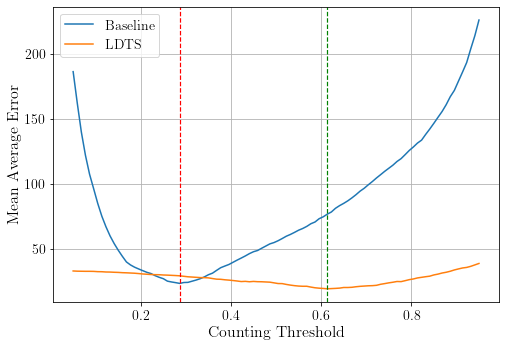

In [51]:

plt.plot(thresholds,error_list_baseline,label = "Baseline")
plt.plot(thresholds,error_list_LDTS,label = "LDTS")

plt.xlabel("Counting Threshold")
plt.ylabel("Mean Average Error")

low = thresholds[error_list_LDTS.index(min(error_list_LDTS))]
print(low)
plt.axvline(x=low, color='g', linestyle='--',lw=1.2)

lowbl = thresholds[error_list_baseline.index(min(error_list_baseline))]

plt.axvline(x=lowbl, color='r', linestyle='--',lw=1.2)


plt.grid()
plt.legend()
#plt.gca().invert_xaxis()
plt.savefig("thresholds_250_250.pdf", format="pdf", bbox_inches="tight")

In [52]:
# Saving data

np.save("bl_errors.npy",error_list_baseline)
np.save("LDTS_errors.npy",error_list_LDTS)
np.save('thresholds.npy',thresholds)

In [44]:
%run functions.py
my_error,mae,LDTS_errors,bl_mae,bl_errors,gts = objective_func([5,1],1,0.78)
print("Average MAE")
print("LDTS: ", mae)
print("baseline: ",bl_mae)

Average MAE
LDTS:  25.105263157894736
baseline:  119.73684210526316


<Figure size 576x391.586 with 0 Axes>

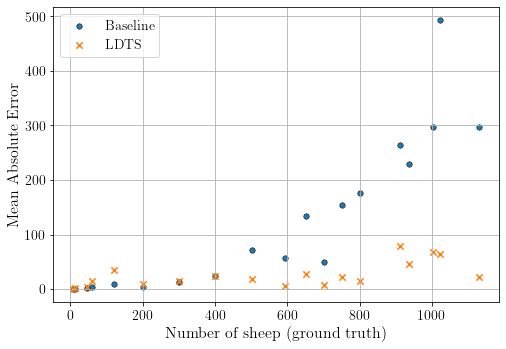

In [45]:
%run functions.py
# plt.scatter(gts,LDTS_errors,label = "LDTS",marker='+')
plt.scatter(gts,bl_errors,label = "Baseline",marker='o',s=30,edgecolor = 'k',linewidths=0.5)
plt.scatter(gts,LDTS_errors,label = "LDTS",marker='x',s=40)
# plt.scatter(num,difference,label = "h difference")
# plt.scatter(num,average,label = "h average")
plt.xticks()
plt.ylabel("Mean Absolute Error")
plt.xlabel("Number of sheep (ground truth)")
plt.grid()
plt.legend()
#plt.gca().invert_xaxis()
plt.savefig("LDTS_7.pdf", format="pdf", bbox_inches="tight")

In [ ]:
objective_func([5,0.00000001])

27.31578947368421

# Testing results - no txt (npy instead)


# Drawing counted bounding boxes on image

In [12]:
%run functions.py


data = np.load("frame_16_!120.npy")
Ts = LDTS_with_no_txt(data,0.9,5,1,False)
# Only processing data with P > 0.2
data = data[data[:,4 ] > 0.2]
# Reshape scaled values to concat onto data
Ts = np.reshape(Ts,(np.shape(Ts)[0],1))
print(np.shape(data))
print(np.shape(Ts))
sixes = np.concatenate((data,Ts),axis=1)

# keep only rows where P >= Ts
mask = sixes[:, 4] >= sixes[:, 5]


mask_bl = sixes[:, 4] >= 0.78


# New array counting data only
ldts = sixes[mask]
ldts = ldts.astype(int)
base_line_ = sixes[mask_bl]
base_line_ = base_line_.astype(int)

# Checking area of boxes 
count = 0
for box in ldts[:,[0,1,2,3]]:
    x1,y1,x2,y2 = box
    box_area = calculate_box_area(x1,y1,x2,y2)
    if box_area < 2*3928  and box_area > 3928/3:
        count += 1



print("ldts count: ", count)
print("bl count: ", np.shape(base_line_)[0])


(148, 5)
(148, 1)
ldts count:  120
bl count:  125


In [13]:
img = cv2.imread('frame_16_!120.jpg')

%run functions.py

box_area_list=[]
# # Draw ldts boxes
for box in ldts[:,[0,1,2,3]]:
    x1,y1,x2,y2 = box
    box_area = calculate_box_area(x1,y1,x2,y2)
    if box_area < 2*3928  and box_area > 3928/3: # checks that the box is within double or half the size of the average box size

        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Draw base line boxes
for box in base_line_[:,[0,1,2,3]]:
    x1,y1,x2,y2 = box
    

    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 1)

cv2.imwrite('frame_16_!120_ldts.png', img)
# cv2.imshow('Image', cv2.resize(img, (1800,900)))
# cv2.waitKey(0)
# cv2.destroyAllWindows()


True

In [8]:
print(stat.mean(box_area_list))

3928


In [224]:
ldts_coords = ldts[:,[0,1,2,3]]
baseline_coords = base_line_[:,[0,1,2,3]]



# convert arrays to sets of tuples
set1 = set([tuple(row) for row in ldts_coords])
set2 = set([tuple(row) for row in baseline_coords])

# find the common rows
common_rows = [list(row) for row in set1.intersection(set2)]

print(common_rows)

for row in common_rows:
    for i in ldts_coords:
        if i == row:
            index_of_ldts.append(np.where())




index = np.where(np.equal(ldts_coords,common_rows))
print(index)


[[991, 413, 1042, 434], [926, 776, 1013, 803], [760, 425, 832, 463], [851, 535, 936, 559], [972, 274, 1050, 299], [619, 378, 693, 428], [915, 748, 1001, 779], [980, 371, 1053, 400], [754, 239, 809, 268], [1242, 446, 1305, 485], [1034, 456, 1108, 481], [380, 429, 459, 454], [928, 683, 1011, 713], [1106, 546, 1169, 595], [990, 443, 1062, 478], [1072, 475, 1144, 499], [1281, 376, 1346, 425], [1174, 387, 1244, 434], [973, 399, 1056, 420], [811, 314, 887, 352], [900, 660, 987, 688], [733, 212, 797, 250], [1137, 355, 1182, 407], [1006, 556, 1087, 581], [122, 348, 214, 392], [972, 737, 1047, 761], [1194, 488, 1231, 542], [465, 283, 538, 310], [517, 422, 585, 455], [749, 366, 819, 403], [988, 700, 1063, 727], [1057, 167, 1094, 225], [900, 724, 978, 748], [971, 303, 1038, 334], [445, 229, 518, 268], [732, 266, 791, 310], [1060, 432, 1136, 460], [1028, 316, 1096, 355], [787, 215, 859, 240], [712, 334, 789, 365], [1310, 459, 1347, 511], [1160, 533, 1196, 597], [1114, 498, 1175, 550], [967, 665, 1

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [194]:
print(common_rows)
length = np.shape(common_rows)[0]
print(length)
common_rows = np.reshape(common_rows,(length/2,4))

[ 4  5  6  7  8  9 10 20]
8


TypeError: 'float' object cannot be interpreted as an integer